In [7]:
!pip install pdf2image
!apt-get install poppler-utils  # Required for pdf2image
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.5).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.

In [8]:
import pytesseract
import numpy as np
import cv2 # OpenCV
from pdf2image import convert_from_path
from matplotlib import pyplot as plt

In [12]:
!tesseract --help-psm


Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


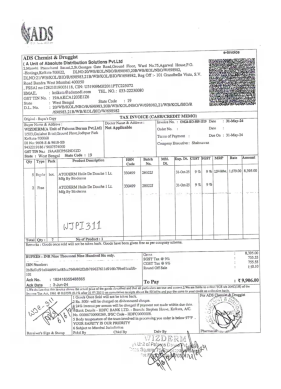

ﬁ‘éﬁf Al ‘
: < -Involc
ADS Chemist & Druggist 4 e-Involce
( A Unit of Absolute Distribution Solutions Pvt.Ltd LR T
2 Munshi Premchand Sarani,2,St.Georges Gate Road,Ground Floor, Ward No.75,Agarwal House,P.O. £ i’; : _;M"{{;??é«;gh
-Hestings Kotkata-700022, DLNO:2-0/WB/KOL/NBO/R/698983,20B/WB/KOL/NBO/W/698982, _l-,é{ 5 1;;??‘£{;“;;:é§n
DLNO:Z]/WB/KOL/BIO/R_/698983,21B/WB/KOL/BIO/W/69S982, Reg Off :- 101 Grandbella Vista, S.V. éﬁ%&ﬁ;’rﬁk H
Road Bandra West Mumbai 400050 u ;ﬁ%.*{%ﬁ,’%‘%f?‘u
, FSSAI no:12821019003118, CIN: US51909MH2011PTC225072 5‘5“*"‘;':’1'3};;* M;}E‘-}; 5
EMAIL . kolkata@adsmedi.com  TEL.NO.: 033-22230080 ‘:5;:“35}3‘1?%5??. % :
GST TIN No. : 19AAKCA1203E1Z6 :fz,ggf,md.ﬁ.q; 3
. DTG (g Ak Laik S
State . West Bengal State Code @ 19 % gyggﬁz}g R
D.L. No. : 20[WB/KOL/NBO/R/698983,20B/WB/KOL/NBO/'W 169%8982,21/WB/KOL/BIO/R [ R S e T
/698983,21B/WB/KOL/BIO/W/698982
Origital - Buyer's Copy TAX INVOICE (CASH/CREDIT MEMO)
Buyer Name & Address : Doctor Nane & Address @ Tnvaice No.

In [9]:
import cv2
import numpy as np
import pytesseract
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import os
import requests

# Define path to the PDF file
pdf_path = '/content/WJPI-2.pdf'

# Convert PDF to images (list of PIL images)
pages = convert_from_path(pdf_path, dpi=300)

# Convert the first page of the PDF to an image (assuming you're working with the first page)
page_image = np.array(pages[0])

# Convert from RGB (PIL) to BGR (OpenCV)
img_bgr = cv2.cvtColor(page_image, cv2.COLOR_RGB2BGR)

# Convert BGR to RGB for display using Matplotlib
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Show the image using Matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axes
plt.show()

# Create a directory for tessdata if it doesn't exist
if not os.path.exists('tessdata'):
    os.makedirs('tessdata')

# Download the English trained data for Tesseract
eng_traineddata_url = "https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata"
eng_traineddata_path = './tessdata/eng.traineddata'
#!tesseract --help-psm
if not os.path.exists(eng_traineddata_path):
    response = requests.get(eng_traineddata_url)
    with open(eng_traineddata_path, 'wb') as f:
        f.write(response.content)

# Tesseract configuration
config_tesseract = '--tessdata-dir tessdata --psm 6'

# Extract text using Tesseract OCR
text = pytesseract.image_to_string(img_rgb, lang='eng', config=config_tesseract)

# Print the extracted text
print(text)


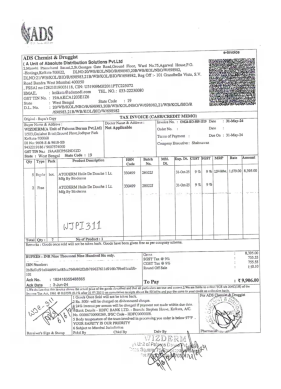

Extracted text has been saved to /content/abc.txt.


In [67]:
import os
from dotenv import load_dotenv
import google.generativeai as genai
import pytesseract
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import time

# Load environment variables from .env file
load_dotenv()

# Configure Google Gemini AI with the API key from environment variables
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# Define path to the PDF file
pdf_path = '/content/WJPI-2.pdf'

# Convert PDF to images (list of PIL images)
pages = convert_from_path(pdf_path, dpi=300)

# Assuming you're working with the first page of the PDF
page_image = pages[0]

# Show the image using Matplotlib (no color conversion needed)
plt.imshow(page_image)
plt.axis('off')  # Hide the axes
plt.show()

# Tesseract configuration
config_tesseract = '--tessdata-dir tessdata --psm 6'

# Extract text directly from the RGB image (PIL format)
text = pytesseract.image_to_string(page_image, lang='eng', config=config_tesseract)

# Define the path for the output text file
output_file_path = '/content/abc.txt'

# Write the extracted text to the file
with open(output_file_path, 'w') as file:
    file.write(text)

print(f"Extracted text has been saved to {output_file_path}.")


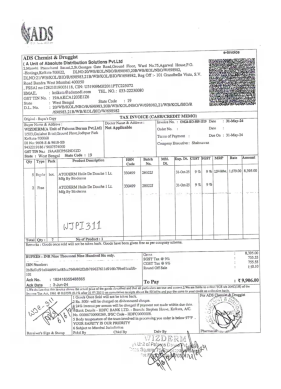

Extracted Details:
Here are the details extracted from the text:

1. **Invoice Number:** OM24-KO-S05-1519
2. **Invoice Date:** 31-May-24
3. **Bill To Details:** 
    - Buyer Name & Address: SVIZDERM (A Unit of Palsons Derma Pvt.Ltd)
    - 1/503,Gariahat Road, Ground Floor, Jodhpur Park
    - Kolkata-700063
    - DL No: 9608-S & 9618-SB
    - 0432219186 / 9007574000
    - Coumpany Executive: Shahnawaz
    - GST TIN No.: 19AAECP5629D1ZD
    - State : West Bengal State Code : 19
4. **GSTN Number:** 19AAKCA1203E1Z6
5. **Invoice Amount:** 9,906.00
6. **Product Name:** ATODERM Huile De Douche 1 Lt 



In [72]:
import os
from dotenv import load_dotenv
import google.generativeai as genai
import pytesseract
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import time

# Load environment variables from .env file
load_dotenv()

# Configure Google Gemini AI with the API key from environment variables
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# Define path to the PDF file
pdf_path = '/content/WJPI-2.pdf'

# Convert PDF to images (list of PIL images)
pages = convert_from_path(pdf_path, dpi=300)

# Assuming you're working with the first page of the PDF
page_image = pages[0]

# Show the image using Matplotlib (no color conversion needed)
plt.imshow(page_image)
plt.axis('off')  # Hide the axes
plt.show()

# Tesseract configuration
config_tesseract = '--tessdata-dir tessdata --psm 6'

# Extract text directly from the RGB image (PIL format)
text = pytesseract.image_to_string(page_image, lang='eng', config=config_tesseract)

# Define the input prompt
input_prompt = (
    "Extract the following details from the text:\n"
    "1. Invoice Number\n"
    "2. Invoice Date\n"
    "3. Bill To Details\n"
    "4. GSTN Number\n"
    "5. Invoice Amount\n"
    "6. Product Name\n"
     "7. Supplier Name"

)

# Function to get response from Gemini API with retry logic
def get_gemini_response(text, prompt, retries=3, delay=5):
    model = genai.GenerativeModel("gemini-1.5-flash")
    formatted_prompt = f"{prompt}\nText: {text}"

    for attempt in range(retries):
        try:
            response = model.generate_content([formatted_prompt])
            if response and response.parts:
                return response.parts[0].text
            else:
                raise ValueError("No valid response parts were returned from the API.")
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt < retries - 1:
                print(f"Retrying in {delay} seconds...")
                time.sleep(delay)
            else:
                raise

# Call Gemini API and extract details
try:
    extracted_details = get_gemini_response(text, input_prompt)
    print("Extracted Details:")
    print(extracted_details)
except Exception as e:
    print(f"An error occurred: {e}")

Last **Attempt**

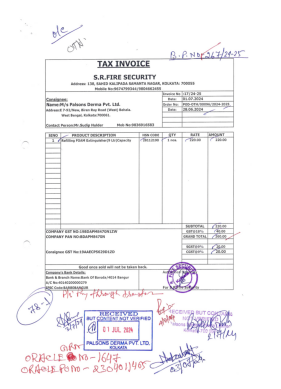

Extracted Details:
Invoice Number|Invoice Date|Bill To Details|GSTN Number|Invoice Amount|Product Name|Supplier Name
|QP NbFEILF 2428|01 JUL 2023|M/s Palsons Derma Pvt. Ltd.|19AAECP5629D1ZD|240.00|Refilling FOAM Extinguisher(9 Ltr)Capacity|S.R.FIRE SECURITY 



In [85]:
import os
from dotenv import load_dotenv
import google.generativeai as genai
import pytesseract
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import time

# Load environment variables from .env file
load_dotenv()

# Configure Google Gemini AI with the API key from environment variables
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# Define path to the PDF file
pdf_path = '/content/oth_invoice_page_3.pdf'

# Convert PDF to images (list of PIL images)
pages = convert_from_path(pdf_path, dpi=300)

# Assuming you're working with the first page of the PDF
page_image = pages[0]

# Show the image using Matplotlib (no color conversion needed)
plt.imshow(page_image)
plt.axis('off')  # Hide the axes
plt.show()

# Tesseract configuration
config_tesseract = '--tessdata-dir tessdata --psm 6'

# Extract text directly from the RGB image (PIL format)
text = pytesseract.image_to_string(page_image, lang='eng', config=config_tesseract)

# Define the input prompt
# Define the input prompt with a focus on extracting the supplier name as the company name
# Define the input prompt with placeholders for missing fields
input_prompt = (
    "Extract the following details from the text of the invoice:\n"
    "1. Invoice Number\n"
    "2. Invoice Date\n"
    "3. Bill To Details\n"
    "4. GSTN Number\n"
    "5. Invoice Amount\n"
    "6. Product Name\n"
    "7.Supplier NAme\n(Who is the sell  the goods.which is mention in the above )"
    "Ensure that the response includes all fields in the following format:\n"
    "Invoice Number|Invoice Date|Bill To Details|GSTN Number|Invoice Amount|Product Name|Supplier Name\n\n"
)

# Function to get response from Gemini API with retry logic
def get_gemini_response(text, prompt, retries=5, delay=5):
    model = genai.GenerativeModel("gemini-1.5-flash")
    formatted_prompt = f"{prompt}\nText: {text}"

    for attempt in range(retries):
        try:
            response = model.generate_content([formatted_prompt])
            if response and response.parts:
                return response.parts[0].text
            else:
                raise ValueError("No valid response parts were returned from the API.")
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt < retries - 1:
                print(f"Retrying in {delay} seconds...")
                time.sleep(delay)
            else:
                raise

# Call Gemini API and extract details
try:
    extracted_details = get_gemini_response(text, input_prompt)
    print("Extracted Details:")
    print(extracted_details)
except Exception as e:
    print(f"An error occurred: {e}")

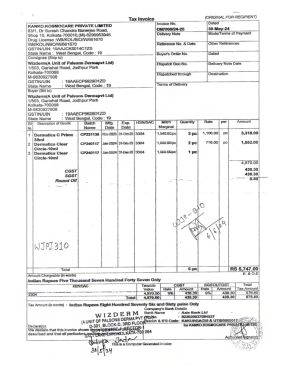

Extracted Details:
Invoice Number|Invoice Date|Bill To Details|GSTN Number|Invoice Amount|Product Name|Supplier Name
--|30-May-24|Wizderm(A Unit of Palsons Dermapvt Lid)
1/503, Gariahat Road, JodhpurPark
Kolkata-700068
M-9830927308
|19AAECP5528D17D|5747.00|Dermatica C Prime|Wizderm(A Unit of Palsons Dermapvt Ltd)



In [88]:
import os
from dotenv import load_dotenv
import google.generativeai as genai
import pytesseract
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import time

# Load environment variables from .env file
load_dotenv()

# Configure Google Gemini AI with the API key from environment variables
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# Define path to the PDF file
pdf_path = '/content/WJPI-1.pdf'

# Convert PDF to images (list of PIL images)
pages = convert_from_path(pdf_path, dpi=300)

# Assuming you're working with the first page of the PDF
page_image = pages[0]

# Show the image using Matplotlib (no color conversion needed)
plt.imshow(page_image)
plt.axis('off')  # Hide the axes
plt.show()

# Tesseract configuration
config_tesseract = '--tessdata-dir tessdata --psm 6'

# Extract text directly from the RGB image (PIL format)
text = pytesseract.image_to_string(page_image, lang='eng', config=config_tesseract)

# Define the input prompt
# Define the input prompt with a focus on extracting the supplier name as the company name
# Define the input prompt with placeholders for missing fields
input_prompt = (
    "Extract the following details from the text of the invoice:\n"
    "1. Invoice Number\n"
    "2. Invoice Date\n"
    "3. Bill To Details\n"
    "4. GSTN Number\n"
    "5. Invoice Amount\n"
    "6. Product Name\n"
    "7. Supplier Name (the company selling the goods, usually mentioned at the top of the invoice)\n\n"
    "If any of the details cannot be extracted, represent the missing values with '--'.\n"
    "Ensure that the response includes all fields in the following format:\n"
    "Invoice Number|Invoice Date|Bill To Details|GSTN Number|Invoice Amount|Product Name|Supplier Name\n\n"
    "If any field is not found, use '--' in its place.\n"
)
# Function to get response from Gemini API with retry logic
def get_gemini_response(text, prompt, retries=5, delay=5):
    model = genai.GenerativeModel("gemini-1.5-flash")
    formatted_prompt = f"{prompt}\nText: {text}"

    for attempt in range(retries):
        try:
            response = model.generate_content([formatted_prompt])
            if response and response.parts:
                return response.parts[0].text
            else:
                raise ValueError("No valid response parts were returned from the API.")
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt < retries - 1:
                print(f"Retrying in {delay} seconds...")
                time.sleep(delay)
            else:
                raise

# Call Gemini API and extract details
try:
    extracted_details = get_gemini_response(text, input_prompt)
    print("Extracted Details:")
    print(extracted_details)
except Exception as e:
    print(f"An error occurred: {e}")

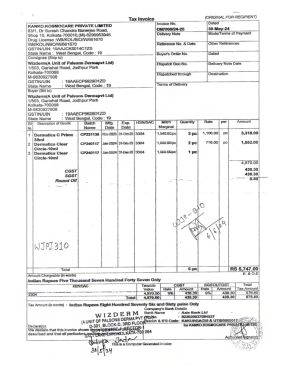

Extracted Details:
Invoice Number|Invoice Date|Bill To Details|GSTN Number|Invoice Amount|Product Name|Supplier Name|Amount
|DWOC024-25|30-May-24|VWizderm(A Unit of Palsons Dermapvt Lid})<br>1/503, Gariahat Road, JodhpurPark<br>Kolkata-700068<br>M-9830927308<br>GSTIN/UIN - : 19AAECP5528D17D<br>State Name : West Bengal, Code: 18|18AAJCKSET14C1ZS|5747.00|Dermatica C Prime|Wizderm{A Unit of Palsons Dermapvt L 1d)|110600.00
|DWOC024-25|30-May-24|VWizderm(A Unit of Palsons Dermapvt Lid})<br>1/503, Gariahat Road, JodhpurPark<br>Kolkata-700068<br>M-9830927308<br>GSTIN/UIN - : 19AAECP5528D17D<br>State Name : West Bengal, Code: 18|18AAJCKSET14C1ZS|5747.00|Dermatica Clear|Wizderm{A Unit of Palsons Dermapvt L 1d)|776.00
|DWOC024-25|30-May-24|VWizderm(A Unit of Palsons Dermapvt Lid})<br>1/503, Gariahat Road, JodhpurPark<br>Kolkata-700068<br>M-9830927308<br>GSTIN/UIN - : 19AAECP5528D17D<br>State Name : West Bengal, Code: 18|18AAJCKSET14C1ZS|5747.00|Dermatica Clear|Wizderm{A Unit of Palsons Dermapvt

In [97]:
import os
from dotenv import load_dotenv
import google.generativeai as genai
import pytesseract
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import time

# Load environment variables from .env file
load_dotenv()

# Configure Google Gemini AI with the API key from environment variables
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# Define path to the PDF file
pdf_path = '/content/WJPI-1.pdf'

# Convert PDF to images (list of PIL images)
pages = convert_from_path(pdf_path, dpi=300)

# Assuming you're working with the first page of the PDF
page_image = pages[0]

# Show the image using Matplotlib (no color conversion needed)
plt.imshow(page_image)
plt.axis('off')  # Hide the axes
plt.show()

# Tesseract configuration
config_tesseract = '--tessdata-dir tessdata --psm 6'

# Extract text directly from the RGB image (PIL format)
text = pytesseract.image_to_string(page_image, lang='eng', config=config_tesseract)

# Define the input prompt
# Define the input prompt with a focus on extracting the supplier name as the company name
# Define the input prompt with placeholders for missing fields
input_prompt = (
    "Extract the following details from the text of the invoice:\n"
    "1. Invoice Number\n"
    "2. Invoice Date\n"
    "3. Bill To Details\n"
    "4. GSTN Number\n"
    "5. Invoice Amount\n"
    "6. Product Name\n"
    "7. Supplier Name (the company selling the goods, usually mentioned at the top of the invoices)\n"
    "8 . Amount of each product if there are many product is in invoice other wise the total amount will be the Amount \n\n"
    "if you show there are many different product name ..please ensure that i want every product separately"
    "please make sure that If "Amount" is not found of a particular product please fill that value by empty string."
    "Return the results in a table format as follows:\n"
    "Invoice Number|Invoice Date|Bill To Details|GSTN Number|Invoice Amount|Product Name|Supplier Name|Amount\n"
    "Separate each field with a | and ensure that the order is exactly as specified.\n"
    "If any field is not found, use '--' in its place.\n"
)

# Function to get response from Gemini API with retry logic
def get_gemini_response(text, prompt, retries=5, delay=5):
    model = genai.GenerativeModel("gemini-1.5-flash")
    formatted_prompt = f"{prompt}\nText: {text}"

    for attempt in range(retries):
        try:
            response = model.generate_content([formatted_prompt])
            if response and response.parts:
                return response.parts[0].text
            else:
                raise ValueError("No valid response parts were returned from the API.")
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt < retries - 1:
                print(f"Retrying in {delay} seconds...")
                time.sleep(delay)
            else:
                raise

# Call Gemini API and extract details
try:
    extracted_details = get_gemini_response(text, input_prompt)
    print("Extracted Details:")
    print(extracted_details)
except Exception as e:
    print(f"An error occurred: {e}")

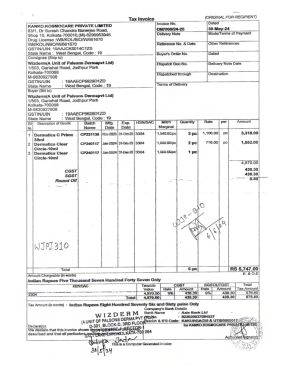

Extracted Details:
Invoice Number,Invoice Date,Bill To Details,GSTN Number,Invoice Amount,Product Name,Supplier Name
--,30-May-24,VWizderm(A Unit of Palsons Dermapvt Lid},19AAECP5528D17D,5747.00,Dermatica C Prime,Wizderm{A Unit of Palsons Dermapvt Lid}
--,30-May-24,VWizderm(A Unit of Palsons Dermapvt Lid},19AAECP5528D17D,5747.00,Dermatica Clear,Wizderm{A Unit of Palsons Dermapvt Lid}
--,30-May-24,VWizderm(A Unit of Palsons Dermapvt Lid},19AAECP5528D17D,5747.00,Dermatica Clear,Wizderm{A Unit of Palsons Dermapvt Lid}



In [94]:
import os
from dotenv import load_dotenv
import google.generativeai as genai
import pytesseract
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import time

# Load environment variables from .env file
load_dotenv()

# Configure Google Gemini AI with the API key from environment variables
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# Define path to the PDF file
pdf_path = '/content/WJPI-1.pdf'

# Convert PDF to images (list of PIL images)
pages = convert_from_path(pdf_path, dpi=300)

# Assuming you're working with the first page of the PDF
page_image = pages[0]

# Show the image using Matplotlib (no color conversion needed)
plt.imshow(page_image)
plt.axis('off')  # Hide the axes
plt.show()

# Tesseract configuration
config_tesseract = '--tessdata-dir tessdata --psm 6'

# Extract text directly from the RGB image (PIL format)
text = pytesseract.image_to_string(page_image, lang='eng', config=config_tesseract)

# Define the input prompt
# Define the input prompt with a focus on extracting the supplier name as the company name
# Define the input prompt with placeholders for missing fields
input_prompt = (
    "Extract the following details from the text of the invoice:\n"
    "1. Invoice Number\n"
    "2. Invoice Date\n"
    "3. Bill To Details\n"
    "4. GSTN Number\n"
    "5. Invoice Amount\n"
    "6. Product Name\n"
    "7. Supplier Name (the company selling the goods, usually mentioned at the top of the invoices)\n\n"
    "If any of the details cannot be extracted, represent the missing values with '--'.\n"
    "if you show there are many different product name ..please ensure that i want every product separately"
    "Return the results in a table format as follows:\n"
    "Invoice Number, Invoice Date, Bill To Details, GSTN Number, Invoice Amount, Product Name, Supplier Name.\n"
    "Separate each field with a comma and ensure that the order is exactly as specified.\n"
    "If any field is not found, use '--' in its place.\n"
)

# Function to get response from Gemini API with retry logic
def get_gemini_response(text, prompt, retries=5, delay=5):
    model = genai.GenerativeModel("gemini-1.5-flash")
    formatted_prompt = f"{prompt}\nText: {text}"

    for attempt in range(retries):
        try:
            response = model.generate_content([formatted_prompt])
            if response and response.parts:
                return response.parts[0].text
            else:
                raise ValueError("No valid response parts were returned from the API.")
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt < retries - 1:
                print(f"Retrying in {delay} seconds...")
                time.sleep(delay)
            else:
                raise

# Call Gemini API and extract details
try:
    extracted_details = get_gemini_response(text, input_prompt)
    print("Extracted Details:")
    print(extracted_details)
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
input_prompt = (
    "Extract the following details from the text of the invoice:\n"
    "1. Invoice Number\n"
    "2. Invoice Date\n"
    "3. Bill To Details\n"
    "4. GSTN Number\n"
    "5. Invoice Amount\n"
    "6. Product Name\n"
    "7. Supplier Name (the company selling the goods, usually mentioned at the top of the invoice)\n\n"
    "If any of the details cannot be extracted, represent the missing values with '--'.\n"
    "Return the results in a table format as follows:\n"
    "Invoice Number, Invoice Date, Bill To Details, GSTN Number, Invoice Amount, Product Name, Supplier Name.\n"
    "Separate each field with a comma and ensure that the order is exactly as specified.\n"
    "If any field is not found, use '--' in its place.\n"
)


In [74]:
text

'ﬁ‘éﬁf Al ‘\n: < -Involc\nADS Chemist & Druggist 4 e-Involce\n( A Unit of Absolute Distribution Solutions Pvt.Ltd LR T\n2 Munshi Premchand Sarani,2,St.Georges Gate Road,Ground Floor, Ward No.75,Agarwal House,P.O. £ i’; : _;M"{{;??é«;gh\n-Hestings Kotkata-700022, DLNO:2-0/WB/KOL/NBO/R/698983,20B/WB/KOL/NBO/W/698982, _l-,é{ 5 1;;??‘£{;“;;:é§n\nDLNO:Z]/WB/KOL/BIO/R_/698983,21B/WB/KOL/BIO/W/69S982, Reg Off :- 101 Grandbella Vista, S.V. éﬁ%&ﬁ;’rﬁk H\nRoad Bandra West Mumbai 400050 u ;ﬁ%.*{%ﬁ,’%‘%f?‘u\n, FSSAI no:12821019003118, CIN: US51909MH2011PTC225072 5‘5“*"‘;\':’1\'3};;* M;}E‘-}; 5\nEMAIL . kolkata@adsmedi.com  TEL.NO.: 033-22230080 ‘:5;:“35}3‘1?%5??. % :\nGST TIN No. : 19AAKCA1203E1Z6 :fz,ggf,md.ﬁ.q; 3\n. DTG (g Ak Laik S\nState . West Bengal State Code @ 19 % gyggﬁz}g R\nD.L. No. : 20[WB/KOL/NBO/R/698983,20B/WB/KOL/NBO/\'W 169%8982,21/WB/KOL/BIO/R [ R S e T\n/698983,21B/WB/KOL/BIO/W/698982\nOrigital - Buyer\'s Copy TAX INVOICE (CASH/CREDIT MEMO)\nBuyer Name & Address : Doctor Nane & 

In [ ]:
# Define the input prompt with a focus on extracting the supplier name as the company name
input_prompt = (
    "Extract the following details from the text of the invoice:\n"
    "1. Invoice Number\n"
    "2. Invoice Date\n"
    "3. Bill To Details\n"
    "4. GSTN Number\n"
    "5. Invoice Amount\n"
    "6. Product Name\n"
    "7. Supplier Name (the company name listed at the top of the invoice)\n\n"
    "Ensure that the Supplier Name is extracted as the company name which is usually located at the top section of the invoice. "
    "The other details should be extracted based on their typical locations in an invoice."
)


In [69]:
input_prompt = """You are an expert in understanding invoices.
You will receive input text as invoices and answer questions based on them.
Ensure that for finding Invoice Type If you identify the document as a "Purchase Debit Note" or if the title or content is related to "debit" in any way,
your response should only include the word "debit" and for the other case you return "credit".
If you did not find any answer for the product name, use Description of goods to find the product name whatever name is there.
If you did not find any answer for Invoice Date, use Date to find Invoice Date whatever name is there.
If any case Date and Invoice Date both are present in the invoice you take Invoice Date as Invoice Date value.
Ensure that the year in the "Invoice Date" is either a 2-digit or 4-digit format.
If you did not find any answer for Invoice Number, use tax invoice number to find Invoice Number whatever number is there.
If you did not find any answer for Supplier Name, use  provider name to find Supplier Name.
Ensure that for finding each product or Description of goods, either a Product ID or Serial Number or product code exists that relates to the product or goods mentioned in the invoice.
Avoid  either unnecessary product names or unnecessary Description of goods beyond what is mentioned in the invoice or unnecessary items being taken as product names and avoid repeating product names. Only consider the product name if an Item ID or Serial Number or product id is given of that.
please make sure that Ensure that for finding each product or Description of goods, HSN number  mentioned in the invoice.
please exclude those items whose HSN number and quantity both are not given.
please make sure that If "Amount" is not found of a particular product please fill that value by empty string.
please make sure that do not repeat the same product name more than one and avoid unnecessary names being taken as product names.
Please follow this rule correctly for all invoices, and ensure that each field is placed in its designated column without merging with other fields.
Please fill up the invoice number, supplier name, and bill-to details for different items, not leaving them blank after the first item.
Always return all responses in this structural format: Invoice No| Invoice Date| Supplier Name| Bill To Details| Product Name| Amount| Invoice Type| . and ensure that each field is placed in its designated column without merging with other fields.
please make sure that all the response follow the structural format which is given above.
please make sure all response text first line contain all fields of structural format columns name.
please make sure that do not filled any fields value by other fields value.
"""


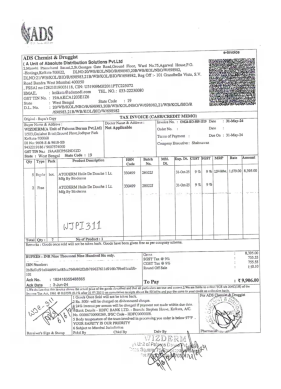

Extracted Details:
Here are the details extracted from the text:

* **Invoice Number:** OM24-KO-S05-1519
* **Invoice Date:** 31-May-24
* **Supplier Name:** ADS Chemist & Druggist (A Unit of Absolute Distribution Solutions Pvt.Ltd)
* **Bill To Details:** SVIZDERM (A Unit of Palsons Derma Pvt.Ltd)
    * 1/503,Gariahat Rrad,Ground Floor,Jodhpur Park
    * Kolkata-700063
* **GSTN Number:** 19AAKCA1203E1Z6 
* **Invoice Amount:** 9,906.00
* **Product Name:** ATODERM Huile De Douche 1 Lt
* **Amount:** 8,395.00
* **Invoice Type:** TAX INVOICE (CASH/CREDIT MEMO) 



In [65]:
import os
from dotenv import load_dotenv
import google.generativeai as genai
import pytesseract
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import time

# Load environment variables from .env file
load_dotenv()

# Configure Google Gemini AI with the API key from environment variables
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

# Define path to the PDF file
pdf_path = '/content/WJPI-2.pdf'

# Convert PDF to images (list of PIL images)
pages = convert_from_path(pdf_path, dpi=300)

# Assuming you're working with the first page of the PDF
page_image = pages[0]

# Show the image using Matplotlib (no color conversion needed)
plt.imshow(page_image)
plt.axis('off')  # Hide the axes
plt.show()

# Tesseract configuration
config_tesseract = '--tessdata-dir tessdata --psm 6'

# Extract text directly from the RGB image (PIL format)
text = pytesseract.image_to_string(page_image, lang='eng', config=config_tesseract)

# Define the input prompt
input_prompt = (
    "Extract the following details from the text:\n"
    "1. Invoice Number\n"
    "2. Invoice Date\n"
    "3. Bill To Details\n"
    "4. GSTN Number\n"
    "5. Invoice Amount\n"
)
# input_prompt = """You are an expert in understanding invoices.
# You will receive input text as invoices and answer questions based on them.
# Ensure that for finding Invoice Type If you identify the document as a "Purchase Debit Note" or if the title or content is related to "debit" in any way,
# your response should only include the word "debit" and for the other case you return "credit".
# If you did not find any answer for the product name, use Description of goods to find the product name whatever name is there.
# If you did not find any answer for Invoice Date, use Date to find Invoice Date whatever name is there.
# If any case Date and Invoice Date both are present in the invoice you take Invoice Date as Invoice Date value.
# Ensure that the year in the "Invoice Date" is either a 2-digit or 4-digit format.
# If you did not find any answer for Invoice Number, use tax invoice number to find Invoice Number whatever number is there.
# If you did not find any answer for Supplier Name, use  provider name to find Supplier Name.
# Ensure that for finding each product or Description of goods, either a Product ID or Serial Number or product code exists that relates to the product or goods mentioned in the invoice.
# Avoid  either unnecessary product names or unnecessary Description of goods beyond what is mentioned in the invoice or unnecessary items being taken as product names and avoid repeating product names. Only consider the product name if an Item ID or Serial Number or product id is given of that.
# please make sure that Ensure that for finding each product or Description of goods, HSN number  mentioned in the invoice.
# please exclude those items whose HSN number and quantity both are not given.
# please make sure that If "Amount" is not found of a particular product please fill that value by empty string.
# please make sure that do not repeat the same product name more than one and avoid unnecessary names being taken as product names.
# Please follow this rule correctly for all invoices, and ensure that each field is placed in its designated column without merging with other fields.
# Please fill up the invoice number, supplier name, and bill-to details for different items, not leaving them blank after the first item.
# Always return all responses in this structural format: Invoice No| Invoice Date| Supplier Name| Bill To Details| Product Name| Amount| Invoice Type| . and ensure that each field is placed in its designated column without merging with other fields.
# please make sure that all the response follow the structural format which is given above.
# please make sure all response text first line contain all fields of structural format columns name.
# please make sure that do not filled any fields value by other fields value.
# """


# Define the query or request text
input_text = "give me the Invoice No, Invoice Date, Supplier Name, Bill To Details, Product Name, Amount, Invoice Type"

# Combine input prompt and request text
combined_prompt = f"{input_prompt}\nRequest: {input_text}\nText: {text}"

# Function to get response from Gemini API with retry logic
def get_gemini_response(text, prompt, retries=3, delay=5):
    model = genai.GenerativeModel("gemini-1.5-flash")
    formatted_prompt = f"{prompt}\nText: {text}"

    for attempt in range(retries):
        try:
            response = model.generate_content([formatted_prompt])
            if response and response.parts:
                return response.parts[0].text
            else:
                raise ValueError("No valid response parts were returned from the API.")
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt < retries - 1:
                print(f"Retrying in {delay} seconds...")
                time.sleep(delay)
            else:
                raise

# Call Gemini API and extract details
try:
    extracted_details = get_gemini_response(text, combined_prompt)
    print("Extracted Details:")
    print(extracted_details)
except Exception as e:
    print(f"An error occurred: {e}")
